# Bike Sharing Assignment

## Problem Statement

The objective is to forecast shared bikes demand of Bike sharing provider in
U.S. *Boombikes* based on usage patterns in relation with weather,
environment and other data. We would be interested in predicting the shared bikes
on various factors including season, temperature, weather and building a
model that can successfully predict the number of shared bikes on relevant factors, which can be used by the provider after the Corona pandemic to boost up their Revenue and make huge profits.

## Data Exploration

In [4]:
# importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading the dataset

df = pd.read_csv(r'D:\Upgrad\ML-1\day.csv')
df_analysis = df.copy()
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# Checking for the Null values

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Dropping the un-necessary columns {'instant','dteday','casual','registered'} 

df.drop('instant', axis=1, inplace=True)
df.drop('dteday', axis=1, inplace=True)
df.drop('casual', axis=1, inplace=True)
df.drop('registered', axis=1, inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# Grouping the variables as categorical and numerical.

category_features = ['season', 'holiday','yr', 'mnth', 'weekday', 'workingday', 'weathersit']
number_features = ['temp', 'atemp', 'hum', 'windspeed' , 'cnt']


for col in category_features:
    df[col] = df[col].astype('category')

## Step-2  Visualising the Data

### Visualising the Categorical variables

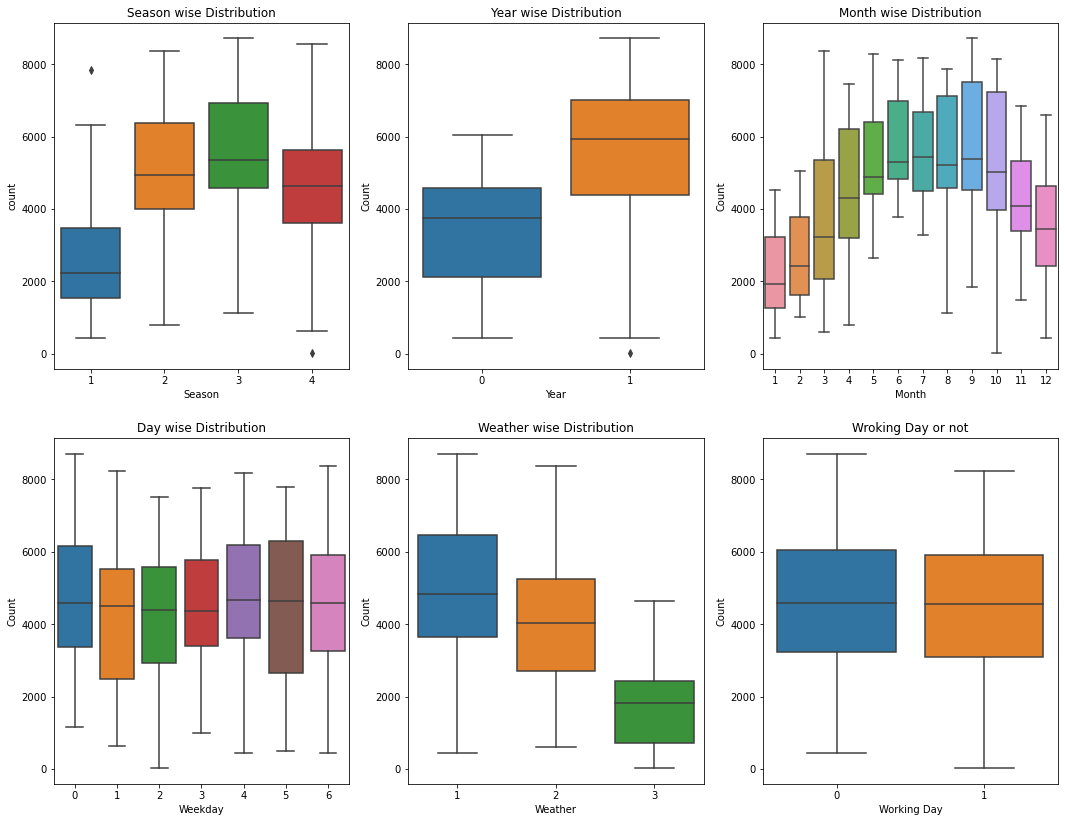

In [12]:
plt.figure(figsize = (18,14) )
plt.subplot(2,3,1)
sns.boxplot(x='season', y = 'cnt', data= df).set(xlabel = 'Season',ylabel ='count')
plt.title('Season wise Distribution')

plt.subplot(2,3,2)
sns.boxplot(x='yr', y = 'cnt', data= df).set(xlabel = 'Year',ylabel ='Count')
plt.title('Year wise Distribution')

plt.subplot(2,3,3)
sns.boxplot(x='mnth', y = 'cnt', data= df).set(xlabel = 'Month',ylabel ='Count')
plt.title('Month wise Distribution')

plt.subplot(2,3,4)
sns.boxplot(x='weekday', y = 'cnt', data= df).set(xlabel = 'Weekday',ylabel ='Count')
plt.title('Day wise Distribution')

plt.subplot(2,3,5)
sns.boxplot(x='weathersit', y = 'cnt', data= df).set(xlabel = 'Weather',ylabel ='Count')
plt.title('Weather wise Distribution')

plt.subplot(2,3,6)
sns.boxplot(x='workingday', y = 'cnt', data= df).set(xlabel = 'Working Day',ylabel ='Count')
plt.title('Wroking Day or not')


plt.show()

### Visualising the Numerical variables

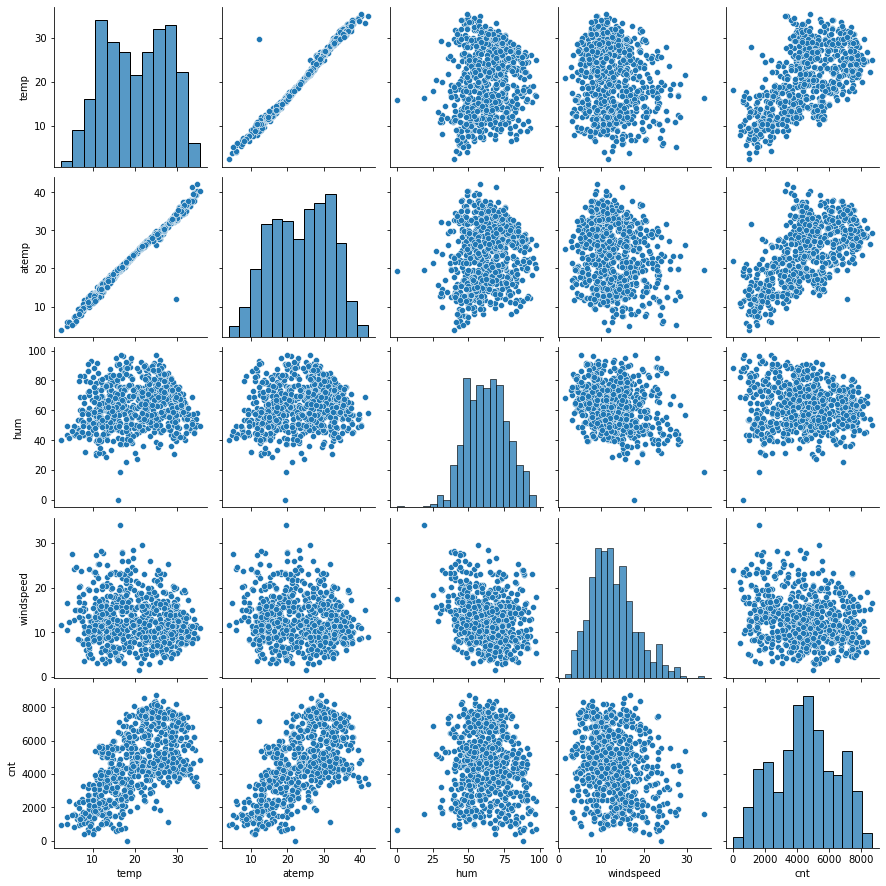

In [13]:
sns.pairplot(df,vars = ['temp', 'atemp', 'hum', 'windspeed','cnt'])
plt.show()

## Correlation Analysis

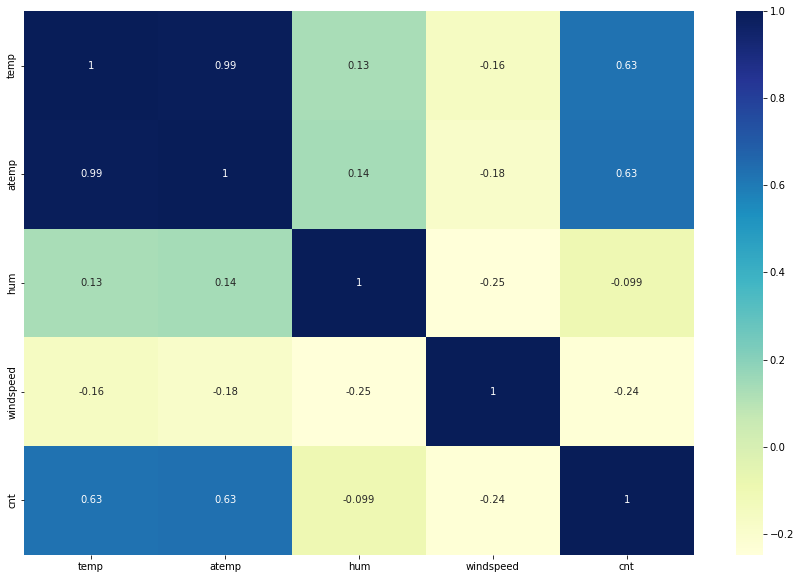

In [14]:
# Checking the correlation between different Numerical variables

plt.figure(figsize = [15,10])
sns.heatmap(df.corr(), annot = True, cmap='YlGnBu')
plt.show()

#### Correlation between 'temp' and 'atemp' is very high, so dropping one of them would be a great idea.

In [15]:
# Dropping the column 'atemp'

df.drop('atemp', axis=1, inplace = True)

## Mapping the different Categorical variables 

In [16]:
df['season']=df['season'].map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'})
df['mnth']=df['mnth'].map({1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April',5 : 'May', 6 : 'June', 7 : 'July', 8 : 'August', 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December'})
df['weekday']=df['weekday'].map({0 : 'Sunday', 1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday'})
df['weathersit']=df['weathersit'].map({1 : 'Clear', 2 : 'Cloudy', 3 : 'Light_Snow_Rain', 4 : 'Heavy_Snow_Rain'})

### Other Categorical binary variables with their meanings and were not changed : 

yr : {0 : 2018, 1 : 2019}

holiday : {0 : Not Holiday, 1 : Holiday}

workingDay : {0 : Not workingDay, 1 : workingDay}

In [17]:
# Fetching the Season-wise count

df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [18]:
# Fetching the Year-wise count

df.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [19]:
# Fetching the Month-wise count

df.mnth.value_counts()

January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: mnth, dtype: int64

In [20]:
# Fetching the Holiday-wise count

df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [21]:
# Fetching the WorkingDay-wise count

df.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [22]:
# Fetching the WeekDay-wise count

df.weekday.value_counts()

Monday       105
Tuesday      105
Sunday       104
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Name: weekday, dtype: int64

In [23]:
# Fetching the Weather-wise count

df.weathersit.value_counts()

Clear              463
Cloudy             246
Light_Snow_Rain     21
Name: weathersit, dtype: int64

## Dummy Variables

In [24]:
df = pd.get_dummies(df, columns = ['season', 'holiday','yr', 'mnth', 'weekday', 'workingday', 'weathersit'], drop_first = True)

In [25]:
df.head()

,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,holiday_1,yr_1,mnth_February,...,mnth_December,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,workingday_1,weathersit_Cloudy,weathersit_Light_Snow_Rain
0,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,8.050924,43.7273,16.636703,1349,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   temp                        730 non-null    float64
 1   hum                         730 non-null    float64
 2   windspeed                   730 non-null    float64
 3   cnt                         730 non-null    int64  
 4   season_summer               730 non-null    uint8  
 5   season_fall                 730 non-null    uint8  
 6   season_winter               730 non-null    uint8  
 7   holiday_1                   730 non-null    uint8  
 8   yr_1                        730 non-null    uint8  
 9   mnth_February               730 non-null    uint8  
 10  mnth_March                  730 non-null    uint8  
 11  mnth_April                  730 non-null    uint8  
 12  mnth_May                    730 non-null    uint8  
 13  mnth_June                   730 non

## Spliting the Data into Train and Test

In [27]:
from sklearn.model_selection import train_test_split

# We will specify this so that train and test dataset always have same rows respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state =100)

In [28]:
df_train.shape

(510, 29)

In [29]:
df_test.shape

(220, 29)

## Scaling the Features

### Using the method - `Min-Max Scaling`

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [33]:
df_train.head()

,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,holiday_1,yr_1,mnth_February,...,mnth_December,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,workingday_1,weathersit_Cloudy,weathersit_Light_Snow_Rain
576,0.815169,0.725633,0.264686,0.827658,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
426,0.442393,0.640189,0.255342,0.465255,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
728,0.245101,0.498067,0.663106,0.204096,0,0,0,0,1,0,...,1,1,0,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0.482973,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0.345824,0.751824,0.380981,0.191095,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
df_train.describe()

,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,holiday_1,yr_1,mnth_February,...,mnth_December,weekday_Monday,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,workingday_1,weathersit_Cloudy,weathersit_Light_Snow_Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499,0.247059,0.262745,0.247059,0.025490,0.507843,0.066667,...,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.711765,0.345098,0.029412
std,0.225858,0.145846,0.169803,0.224421,0.431725,0.440557,0.431725,0.157763,0.500429,0.249689,...,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.453386,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


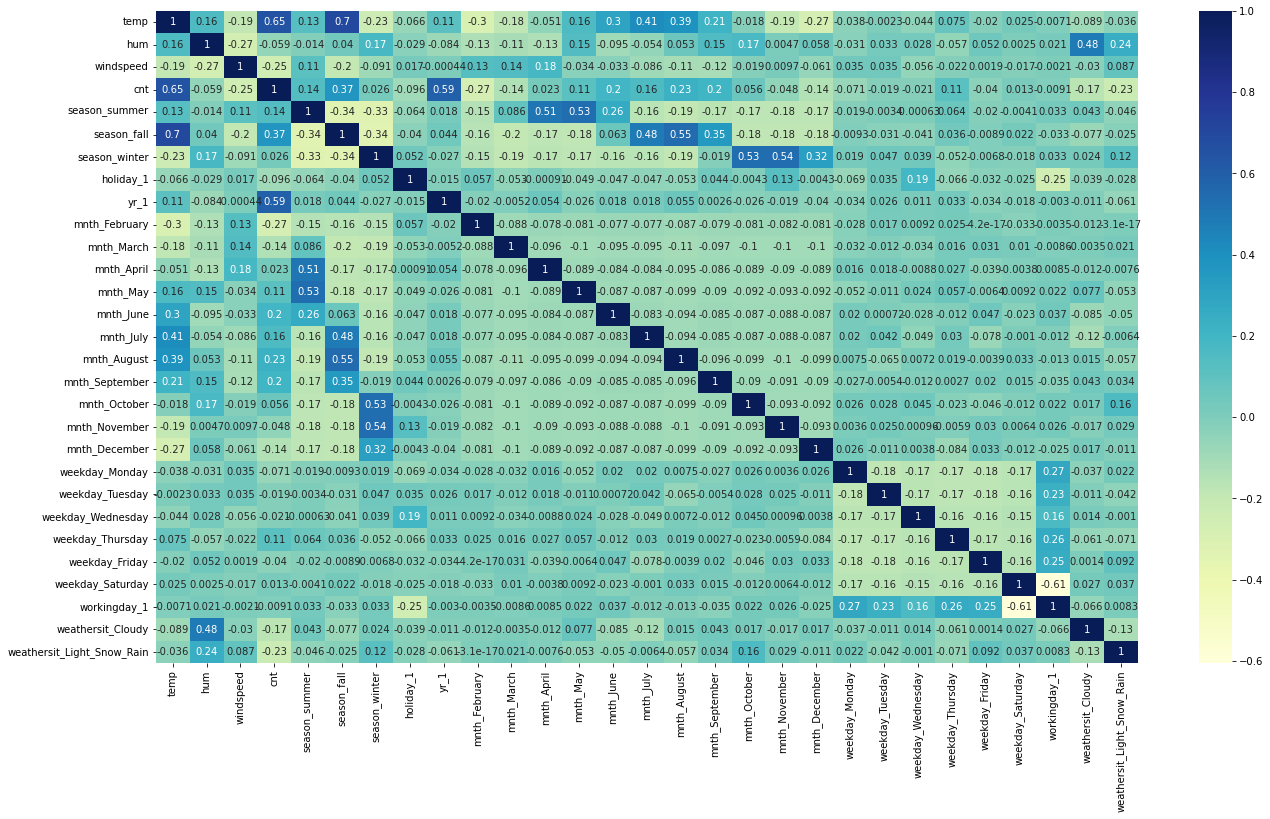

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (22, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Feature `temp` i.e. temperature is highly correlated with target variable relatively.

Text(0, 0.5, 'Count')

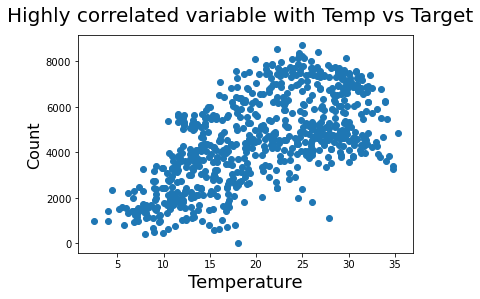

In [36]:
# Plotting scatter-plot with temp and target variable.
fig = plt.figure()
plt.scatter(df.temp,df.cnt)
fig.suptitle('Highly correlated variable with Temp vs Target', fontsize=20)               
plt.xlabel('Temperature', fontsize=18)                       
plt.ylabel('Count', fontsize=16)

### Dividing into X and Y sets for the model building

In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

We will be first using the `LinearRegression` function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn).
Then we will be using Manual Approach using `p-value` and `VIF` for better model build.

In [38]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [40]:
# List of variable with their ranking and support

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('holiday_1', True, 1),
 ('yr_1', True, 1),
 ('mnth_February', False, 10),
 ('mnth_March', True, 1),
 ('mnth_April', False, 3),
 ('mnth_May', True, 1),
 ('mnth_June', False, 2),
 ('mnth_July', False, 11),
 ('mnth_August', True, 1),
 ('mnth_September', True, 1),
 ('mnth_October', True, 1),
 ('mnth_November', False, 12),
 ('mnth_December', False, 13),
 ('weekday_Monday', False, 8),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 7),
 ('weekday_Thursday', False, 5),
 ('weekday_Friday', False, 6),
 ('weekday_Saturday', False, 14),
 ('workingday_1', False, 4),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light_Snow_Rain', True, 1)]

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_summer', 'season_fall',
       'season_winter', 'holiday_1', 'yr_1', 'mnth_March', 'mnth_May',
       'mnth_August', 'mnth_September', 'mnth_October', 'weathersit_Cloudy',
       'weathersit_Light_Snow_Rain'],
      dtype='object')

In [42]:
X_train.columns[~rfe.support_]

Index(['mnth_February', 'mnth_April', 'mnth_June', 'mnth_July',
       'mnth_November', 'mnth_December', 'weekday_Monday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weekday_Thursday', 'weekday_Friday',
       'weekday_Saturday', 'workingday_1'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [43]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [46]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          1.00e-188
Time:                        21:21:58   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Column `mnth_May` can be removed, as it is insignificant in the presence of other variables.

In [47]:
X_train_new = X_train_rfe.drop(["mnth_May"], axis = 1)

#### Rebuilding the Model without the `mnth_May` column.

In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [49]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [50]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          2.46e-189
Time:                        21:22:13   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [107]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.85
5,season_fall,6.29
1,temp,3.72
4,season_summer,2.66
6,season_winter,2.33
2,hum,1.90
10,mnth_August,1.68
13,weathersit_Cloudy,1.56
12,mnth_October,1.51
11,mnth_September,1.40


Column `season_fall` can be removed, as it is insignificant in the presence of other variables, also it has high VIF.

In [108]:
X_train_new = X_train_new.drop(['season_fall'], axis=1)

#### Rebuilding the Model without the `mnth_May` and `season_fall` column.

In [109]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [110]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [111]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          5.94e-190
Time:                        15:16:48   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [112]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,46.85
2,hum,1.86
5,season_winter,1.78
1,temp,1.62
12,weathersit_Cloudy,1.55
11,mnth_October,1.48
9,mnth_August,1.46
4,season_summer,1.38
10,mnth_September,1.25
13,weathersit_Light_Snow_Rain,1.24


Column `mnth_March` can be removed, as it is insignificant in the presence of other variables.

In [113]:
X_train_new = X_train_new.drop(['mnth_March'], axis=1)

#### Rebuilding the Model without the `mnth_May`, `season_fall` and `mnth_March` columns.

In [114]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [115]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [116]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          1.49e-190
Time:                        15:17:19   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [117]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.88
2,hum,1.86
5,season_winter,1.71
1,temp,1.59
11,weathersit_Cloudy,1.55
10,mnth_October,1.48
8,mnth_August,1.45
4,season_summer,1.38
9,mnth_September,1.24
12,weathersit_Light_Snow_Rain,1.24


Column `mnth_October` can be removed, as it is insignificant in the presence of other variables.

In [118]:
X_train_new = X_train_new.drop(['mnth_October'], axis=1)

#### Rebuilding the Model without the `mnth_May`, `season_fall`, `mnth_March` and `mnth_October` columns.

In [119]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [120]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [121]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.5
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          7.50e-191
Time:                        15:18:30   Log-Likelihood:                 507.86
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     498   BIC:                            -940.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [122]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,45.17
2,hum,1.86
10,weathersit_Cloudy,1.55
1,temp,1.54
8,mnth_August,1.44
4,season_summer,1.37
5,season_winter,1.32
11,weathersit_Light_Snow_Rain,1.23
9,mnth_September,1.21
3,windspeed,1.18


Column `mnth_August` can be removed, as it is insignificant in the presence of other variables.

In [123]:
X_train_new = X_train_new.drop(['mnth_August'], axis=1)

#### Rebuilding the Model without the `mnth_May`, `season_fall`, `mnth_March`, `mnth_October` and `mnth_August` columns.

In [124]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [125]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [126]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          1.32e-189
Time:                        15:18:53   Log-Likelihood:                 502.03
No. Observations:                 510   AIC:                            -982.1
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [127]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.97
2,hum,1.86
9,weathersit_Cloudy,1.55
1,temp,1.27
5,season_winter,1.25
10,weathersit_Light_Snow_Rain,1.23
4,season_summer,1.19
3,windspeed,1.18
8,mnth_September,1.11
7,yr_1,1.03


In [128]:
X_train_new.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'holiday_1', 'yr_1', 'mnth_September', 'weathersit_Cloudy',
       'weathersit_Light_Snow_Rain'],
      dtype='object')

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [129]:
y_train_count = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

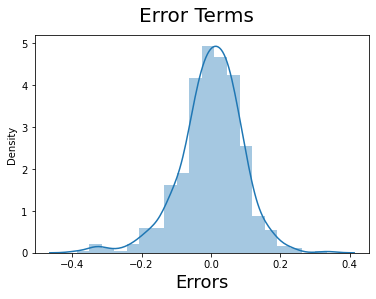

In [130]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [131]:
# Applying the Scaling to all Numerical features columns
number_features_final = ['temp', 'hum', 'windspeed' , 'cnt']

df_test[number_features_final] = scaler.transform(df_test[number_features_final])

#### Dividing into X_test and y_test

In [132]:
y_test = df_test.pop('cnt')
X_test = df_test

In [133]:
X_train_new2 = X_train_new.drop(['const'], axis=1)

In [134]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new2.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [135]:
X_test_new.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'holiday_1', 'yr_1', 'mnth_September', 'weathersit_Cloudy',
       'weathersit_Light_Snow_Rain'],
      dtype='object')

In [136]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

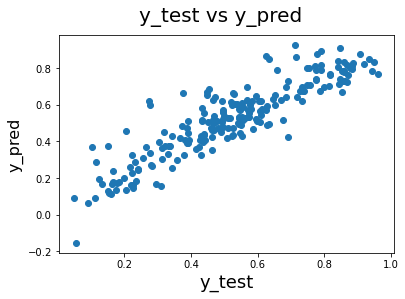

In [137]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [138]:
lm1 = sm.OLS(y_test,X_test_new).fit()   # Running the linear model

In [139]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     94.21
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           9.15e-72
Time:                        15:20:12   Log-Likelihood:                 209.96
No. Observations:                 220   AIC:                            -397.9
Df Residuals:                     209   BIC:                            -360.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [143]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8051741066002439

### Reporting the Final Model

##### Hence, we can see a decent model has been created.

##### From both the summary i.e. train and test data we can see the `adjusted R-squared value` for them is around `83%` and `81%` respectively.

#### So, the equation of our best fitted line is:



$ cnt = 0.23 + 0.57  \times  temp - 0.17  \times hum - 0.187 \times windspeed + 0.09 \times season_summer + 0.14 \times summer_winter - 0.1 \times holiday_1 + 0.23 \times yr_1 + 0.11 \times mnth_September - 0.052 \times weathersit_Cloudy - 0.237 \times weathersit_Light_Snow_Rain $


## Inferences :

In [141]:
newDf = pd.concat((X_train_new2,df.cnt),axis=1)

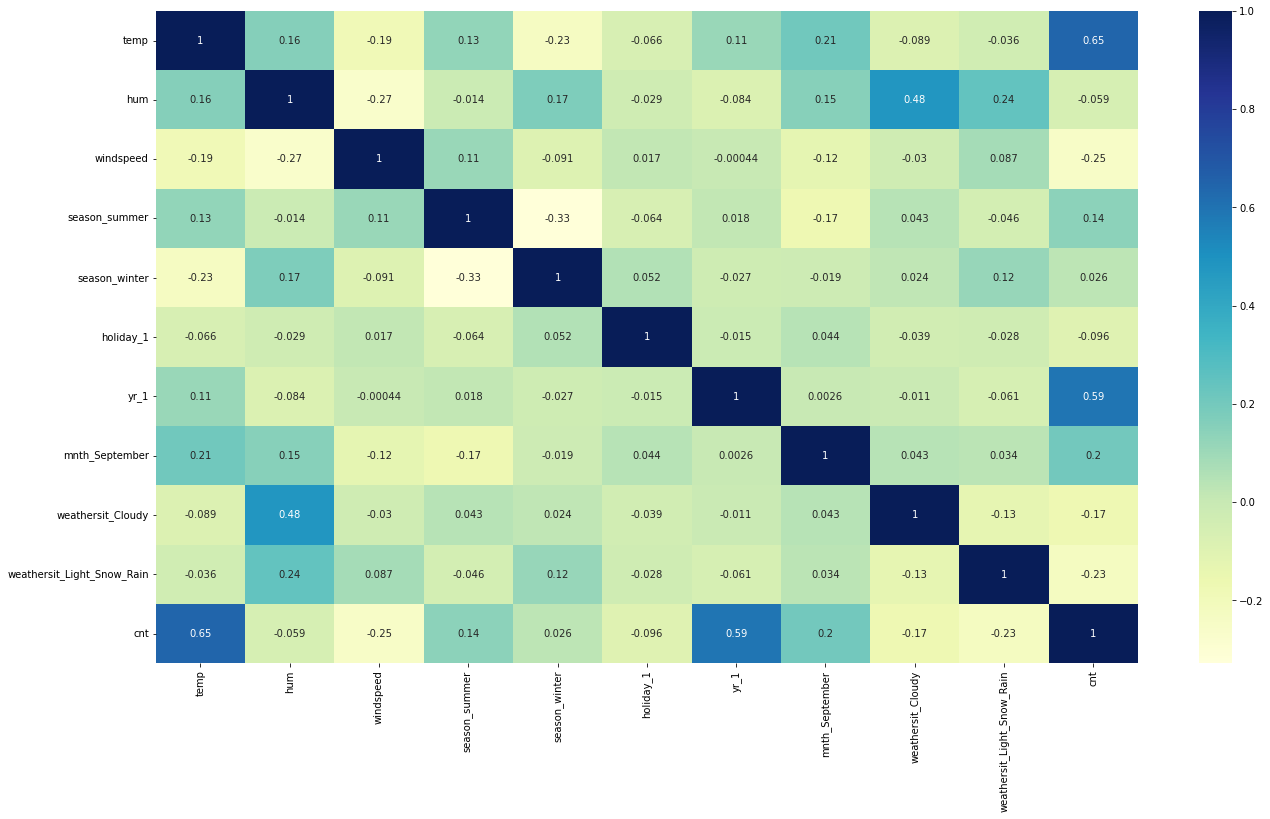

In [142]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (22, 12))
sns.heatmap(newDf.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above heatmaps we can see that among these variables which can be very useful for the prediction of shared bikes are : `temp`, `yr_1`, `mnth_september`. 

Which corresponds as :

`temp`: temperature

`yr_1`: Year 2019

`mnth_September`: September month

-------------------------X--------------------------